<a href="https://colab.research.google.com/github/JIKMAN/Data-Analytics/blob/master/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train-data.csv')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.shape

(6019, 14)

In [ ]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df = data.drop(["Unnamed: 0", "New_Price"], axis = 1)
df.dropna("index", inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(5975, 12)

In [ ]:
non_power = data[data['Power'].isnull()].index
df = df.drop(index=non_power, axis=0)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df[df['Power'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
## 차 브랜드 네임 정리

len(df['Name'].unique()) ## 1855 종류

names = list(df.Name)
for i in range(len(names)):
    names[i] = names[i].split(' ')[0]
df.Name = names
len(df['Name'].unique()) ## 31 종류
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
5974,Chevrolet,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [ ]:
## CC/ kmpl 등 단위 제거

mile = list(df.Mileage)
engine = list(df.Engine)
power = list(df.Power)

for i in range(len(names)):
    mile[i] = mile[i].split(' ')[0]
    engine[i] = engine[i].split(' ')[0]
    power[i] = power[i].split(' ')[0]

df.Mileage = mile
df.Engine = engine
df.Power = power
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [ ]:
idx = df[df['Power'] =='null'].index
idx

Int64Index([  76,   79,   89,  120,  143,  225,  242,  259,  304,  305,
            ...
            5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941],
           dtype='int64', length=103)

In [ ]:
df = df.drop(index=idx,axis=0)

In [ ]:
df['Power'] = df['Power'].astype(float)

In [ ]:
df['Year'] = pd.Categorical(df['Year'])
df['Seats'] = pd.Categorical(df['Seats'])

In [ ]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [ ]:
df.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000,26.60,998.0,58.16,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,41000,19.67,1582.0,126.20,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,46000,18.20,1199.0,88.70,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,87000,20.77,1248.0,88.76,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(5836, 79)

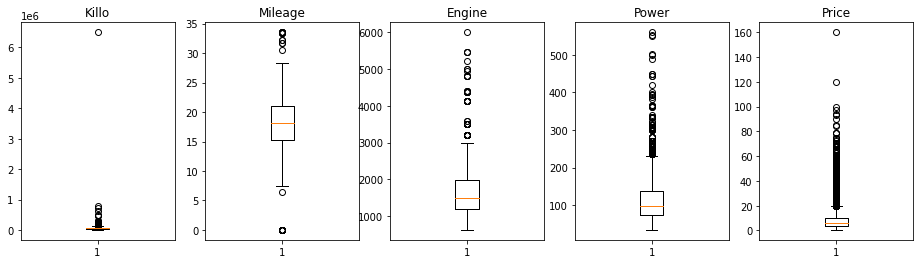

In [ ]:
# 이상치 확인

fig,ax = plt.subplots(1, 5, figsize=(16,4))
ax[0].boxplot(list(df.Kilometers_Driven))
ax[0].set_title("Killo")

ax[1].boxplot(df.Mileage)
ax[1].set_title("Mileage")

ax[2].boxplot(df.Engine)
ax[2].set_title("Engine")

ax[3].boxplot(df.Power)
ax[3].set_title("Power")

ax[4].boxplot(df.Price)
ax[4].set_title("Price")


plt.show()

In [ ]:
# killo 이상치 제거

df = df.drop(index= df[df['Kilometers_Driven'] > 6000000].index, axis=0)

{'boxes': [<matplotlib.lines.Line2D at 0x7f52637b72d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52637bc2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52637c2310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52637bcd90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52637b7810>,
  <matplotlib.lines.Line2D at 0x7f52637b7d50>]}

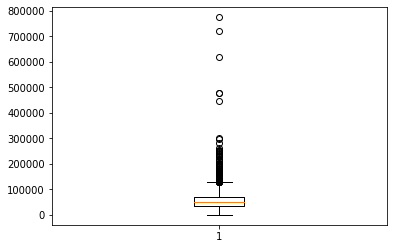

In [ ]:
plt.boxplot(df.Kilometers_Driven)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


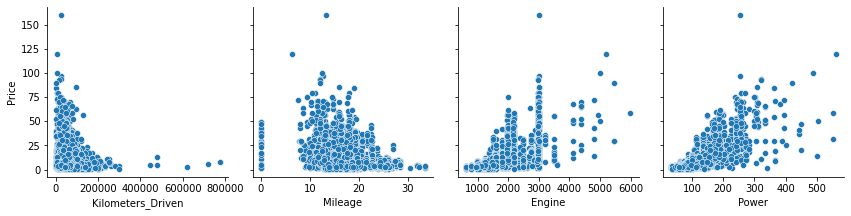

In [ ]:
sns.pairplot(data = df, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars='Price', size=3)

### 데이터셋 생성

In [ ]:
### train 데이터 생성

y = df[['Price']].to_numpy()
df = df.drop(columns=['Price'])

In [ ]:
x = df.values
columns = df.columns

In [ ]:
scaler = preprocessing.MinMaxScaler()
tmp = scaler.fit_transform(x)
df = pd.DataFrame(tmp)
df.columns = columns

x = df.to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)

### 모델링

In [ ]:
## 다중 선형 회귀

lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print('Train Accuracy : ', format(lr.score(x_train, y_train)) )

Train Accuracy :  0.7954163273236562


In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
print('Test Accuracy : ', format(lr.score(x_test, y_test)))


Test Accuracy :  0.8162173972122461
Test Accuracy :  0.8162173972122461


In [ ]:
mean_absolute_error(y_test, y_predict)

# 데이터의 Price 가 해외 인도 루피 기준으로 환산되어 있다고 하므로
# 원화로 환산하면 440만원 정도의 오차

2.782193115504374

## 앙상블 부스팅 알고리즘 이용

In [ ]:
## GradientBoostingRegresion

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 그리드서치를 이용해서 최적의  파라미터 찾기

num_estimators = [100,500,1000]
learn_rates = [0.1, 0.5, 1]
max_depths = [1, 2, 3, 4]
min_samples_leaf = [5,10,15]
min_samples_split = [2,5,10]

param_grid = {'n_estimators': num_estimators,
            'learning_rate': learn_rates,
             'max_depth': max_depths,
             'min_samples_leaf': min_samples_leaf,
             'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
                          param_grid, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

''' 결과
{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}
 '''

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
gb = GradientBoostingRegressor(min_samples_leaf=10, min_samples_split=5, learning_rate=0.5, max_depth=4, n_estimators=500)
gb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.5, max_depth=4, min_samples_leaf=10,
                          min_samples_split=5, n_estimators=500)

In [ ]:
y_gb_predict = gb.predict(x_test)

In [ ]:
print('Train data Acuuracy : ', format(gb.score(x_train, y_train)))

Train data Acuuracy :  0.9966689019879995


In [ ]:
print('Test data Acuuracy : ', format(gb.score(x_test, y_test)))

Test data Acuuracy :  0.8932446440666306


In [ ]:
mean_absolute_error(y_test, y_gb_predict)

# 원화로 환산하면 223만원 정도의 오차
# 선형회귀의 결과와 비교했을 때 오차값이 훨씬 줄어들었다.

1.4614009551112164

원화로 환산하면 223만원 정도의 오차

선형회귀의 결과와 비교했을 때 오차값이 훨씬 줄어들었다.

## RandomForest 앙상블 이용

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, random_state = 42)
rfr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
print('Train data Accuracy : ', format(rfr.score(x_train, y_train)))

Train data Accuracy :  0.9821959740194656


In [ ]:
y_predict = rfr.predict(x_test)

In [ ]:
print('Test Accuracy : ', format(rfr.score(x_test,y_test)))

Test Accuracy :  0.9078796886246785


In [ ]:
mean_absolute_error(y_test, y_predict)

1.4297481411266937

실측치와 예측치 차이 가격 234만원!